# LAB #5 ikinci aşama
## Yağmur Derya
## 171024011


In [1]:
# kutuphaneler tanimlandi
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv  # OpenCV kütüphanesi

%matplotlib notebook

### Fig 10.16 (a-b-c-d)

<IPython.core.display.Javascript object>


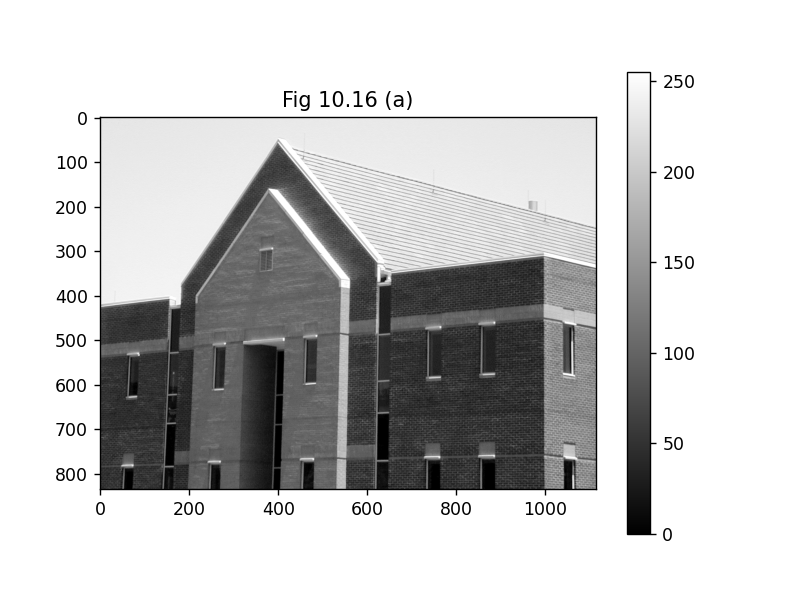

In [2]:
inputImg10_16 = cv.imread("Fig1016(a)(building_original).pgm", 0)                       # goruntu okundu
outputImg = cv.normalize(inputImg10_16.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) # 0-1 araliginda normalize edildi

# goruntunun yazdirilmasi
plt.figure("Fig 10.16 (a)")               # yeni figur
plt.imshow(inputImg10_16, cmap = "gray")  # goruntu yazdirildi
plt.title("Fig 10.16 (a)")                # baslik eklendi
plt.colorbar()                            # renk bari eklendi

In [3]:
# sobel operatoru g_x
filter_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # x yonundeki degisim
g_x = cv.filter2D(outputImg, -1, filter_x)
g_x_abs = abs(g_x) # |g_x|

In [4]:
# sobel operatoru g_y
filter_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # y yonundeki degisim
g_y = cv.filter2D(outputImg, -1, filter_y)
g_y_abs = abs(g_y) # |g_y|

<IPython.core.display.Javascript object>


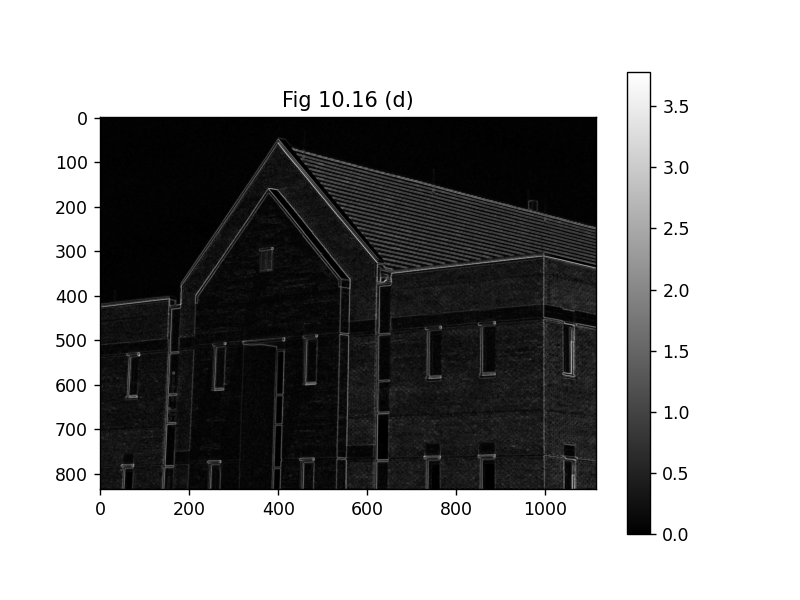

In [5]:
# sobel goruntusu
sobel = g_x_abs + g_y_abs

# goruntunun yazdirilmasi
plt.figure("Fig 10.16 (d)")      # yeni figur
plt.imshow(sobel, cmap = "gray") # goruntu yazdirildi
plt.title("Fig 10.16 (d)")       # baslik eklendi
plt.colorbar()                   # renk bari eklendi

### Fig 10.18 (a-b-c-d)

In [6]:
inputImg10_16 = cv.imread("Fig1016(a)(building_original).pgm", 0)                       # goruntu okundu
outputImg = cv.normalize(inputImg10_16.astype("float"), None, 0.0, 1.0, cv.NORM_MINMAX) # 0-1 araliginda normalize edildi

Img_smoothed = cv.blur(outputImg, (5, 5))   # 5x5 average filtre ile goruntu bulaniklastirildi (Fig 10.18 (a))

In [7]:
# sobel operatoru g_x
filter_x_smoothed = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # x yonundeki degisim
g_x_smoothed = cv.filter2D(Img_smoothed, -1, filter_x_smoothed)
g_x_abs_smoothed = abs(g_x_smoothed) # |g_x|

In [8]:
# sobel operatoru g_y
filter_y_smoothed = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # y yonundeki degisim
g_y_smoothed = cv.filter2D(Img_smoothed, -1, filter_y_smoothed)
g_y_abs_smoothed = abs(g_y_smoothed) # |g_y|

<IPython.core.display.Javascript object>


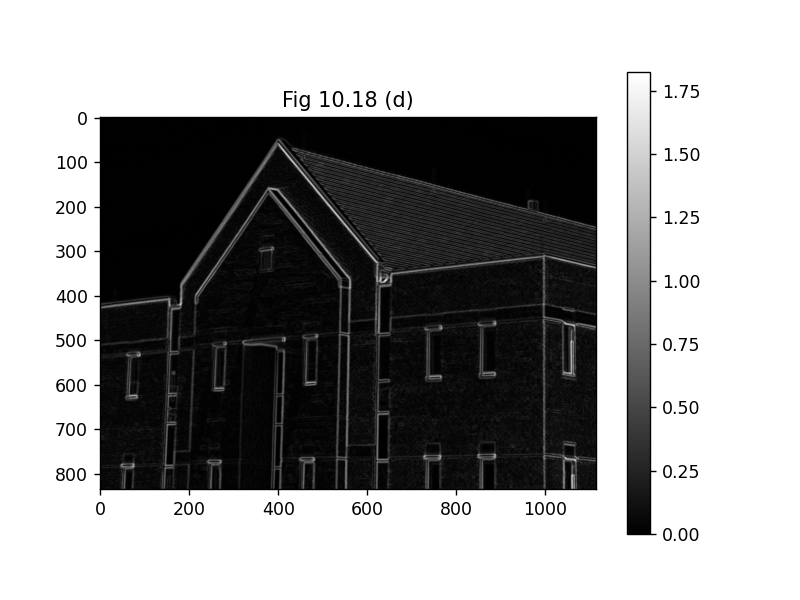

In [9]:
# sobel goruntusu
sobel_smoothed = g_x_abs_smoothed + g_y_abs_smoothed

# goruntunun yazdirilmasi
plt.figure("Fig 10.18 (d)")                 # yeni figur
plt.imshow(sobel_smoothed, cmap = "gray")   # goruntu yazdirildi
plt.title("Fig 10.18 (d)")                  # baslik eklendi
plt.colorbar()                              # renk bari eklendi

## 1. Birinci Aşama

### 1.1. Fig 10.20 (a)

<IPython.core.display.Javascript object>


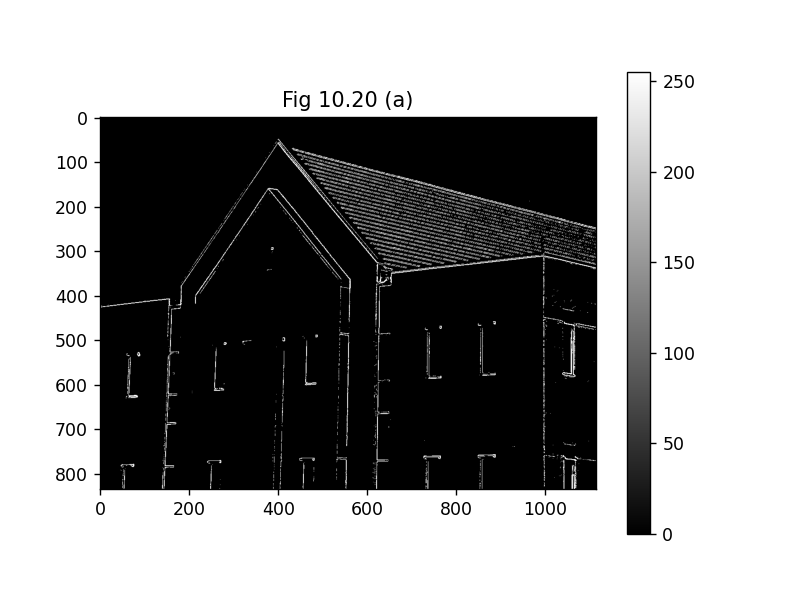

In [10]:
T_a = np.amax(sobel)*0.33 # Fig 10.16 (d) goruntusunun max degerinin %33'u

# treshold
sobel[sobel >= T_a] = 255 # max degerin 0.33unden buyukse 255
sobel[sobel < T_a] = 0    # kucukse 0

outputImg10_20a = sobel

plt.figure("Fig 10.20 (a)")                  # yeni figur
plt.imshow(outputImg10_20a, cmap = "gray")   # goruntu yazdirildi
plt.title("Fig 10.20 (a)")                   # baslik eklendi
plt.colorbar()                               # renk bari eklendi

### 1.2. Fig 10.20 (b)

<IPython.core.display.Javascript object>


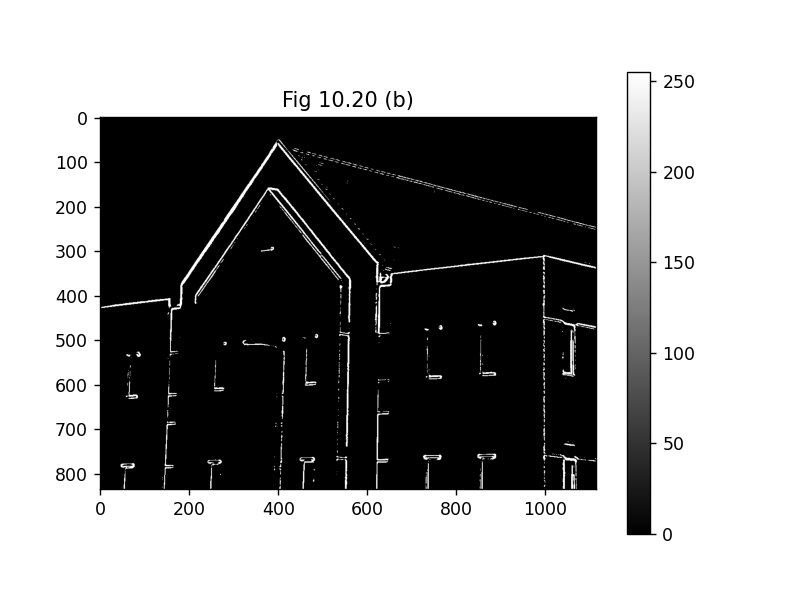

In [11]:
T_b = np.amax(sobel_smoothed)*0.33 # Fig 10.18 (d) goruntusunun max degerinin %33'u

# treshold
sobel_smoothed[sobel_smoothed >= T_b] = 255 # max degerin 0.33unden buyukse 255
sobel_smoothed[sobel_smoothed < T_b] = 0    # kucukse 0

outputImg10_20b = sobel_smoothed

plt.figure("Figure 10.20 (b)")             # yeni figur
plt.imshow(outputImg10_20b, cmap = "gray") # goruntu yazdirildi
plt.title("Fig 10.20 (b)")                 # baslik eklendi
plt.colorbar()                             # renk bari eklendi

## 2. İkinci Aşama
### 2.1.

<IPython.core.display.Javascript object>


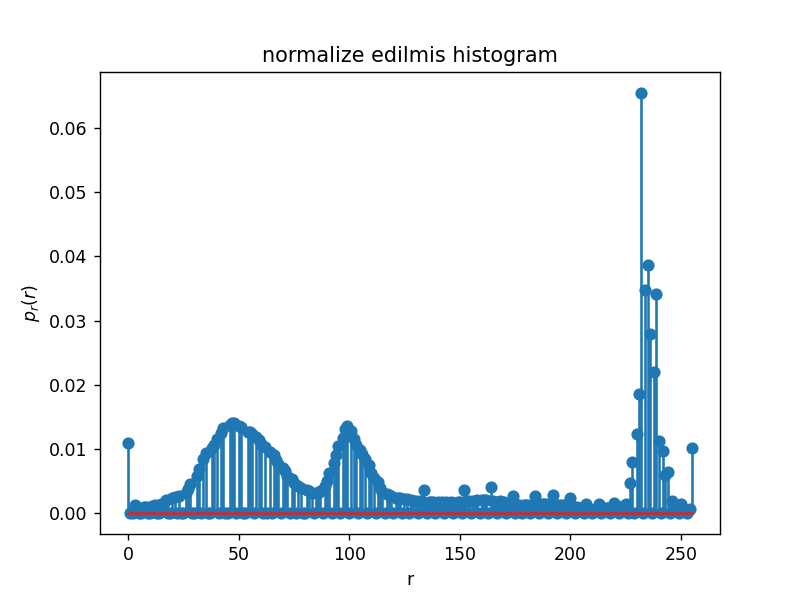

<IPython.core.display.Javascript object>


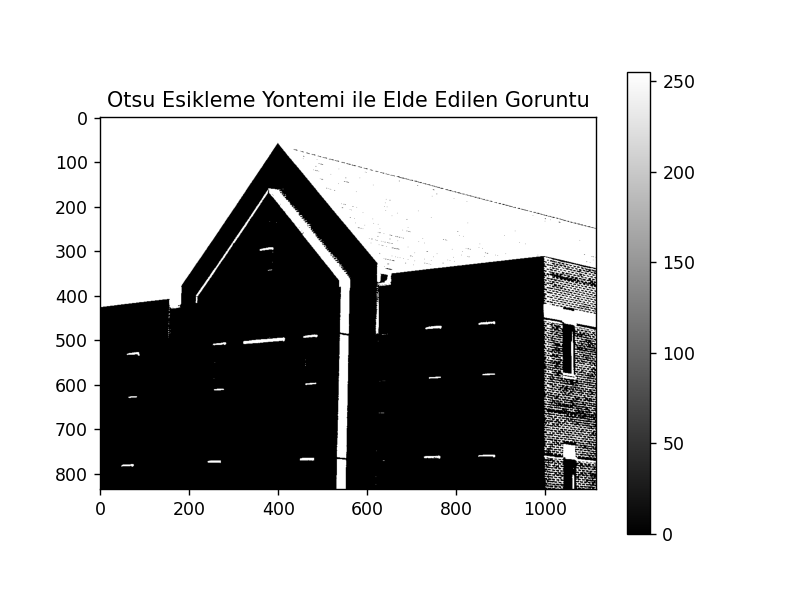

In [12]:
inputImg10_16 = cv.imread("Fig1016(a)(building_original).pgm", 0)  # goruntu okundu

histogram = cv.calcHist([inputImg10_16], [0], None, [256], [0, 256]) # goruntunun histogrami hesaplandi
p = histogram/histogram.sum() # (0-1) araliginda histogram normalize edildi

q1 = 0      # kumulatif toplam icin baslangic degeri
m = 0       # kumulatif ortalama icin baslangic degeri
mg = 0      # global ortalama icin baslangic degeri
var_max = 0 # maksimum varyansi bulmak icin olabilecek min varyans degeri baslangic degeri olarak atandi

for i in range(0, 256):
    mg += i*p[i]   # global ortalama

for i in range(0, 256):
    q1 += p[i]     # kumulatif toplam
    m  += (i*p[i]) # kumulatif ortalama
    var_b = ((mg * q1 - m)**2)/(q1*(1-q1)) # between-class varyans
    
    if var_b > var_max: # eger varyans degeri eldeki maksimum degerden buyukse
        var_max = var_b # yeni maksimum deger bu varyansin degerine esitlendi
        t = i           # varyansin indeksi threshold degeri (t) olarak atandi

# esikleme islemi
thresh, outputImg_otsu = cv.threshold(inputImg10_16, t, 255, cv.THRESH_BINARY) # belirlenen t degerine gore goruntu olusturuldu

# kontrol amacli normalize histogram icin cizdirildi
plt.figure("normalized histogram")
plt.stem(p);
plt.title("normalize edilmis histogram")
plt.xlabel("r")
plt.ylabel("$p_r(r)$")
plt.show()

# Otsu yontemi ile esiklenmis goruntu cizdirildi
plt.figure("OTSU")
plt.imshow(outputImg_otsu, cmap = "gray")
plt.title("Otsu Esikleme Yontemi ile Elde Edilen Goruntu")
plt.colorbar()

<IPython.core.display.Javascript object>


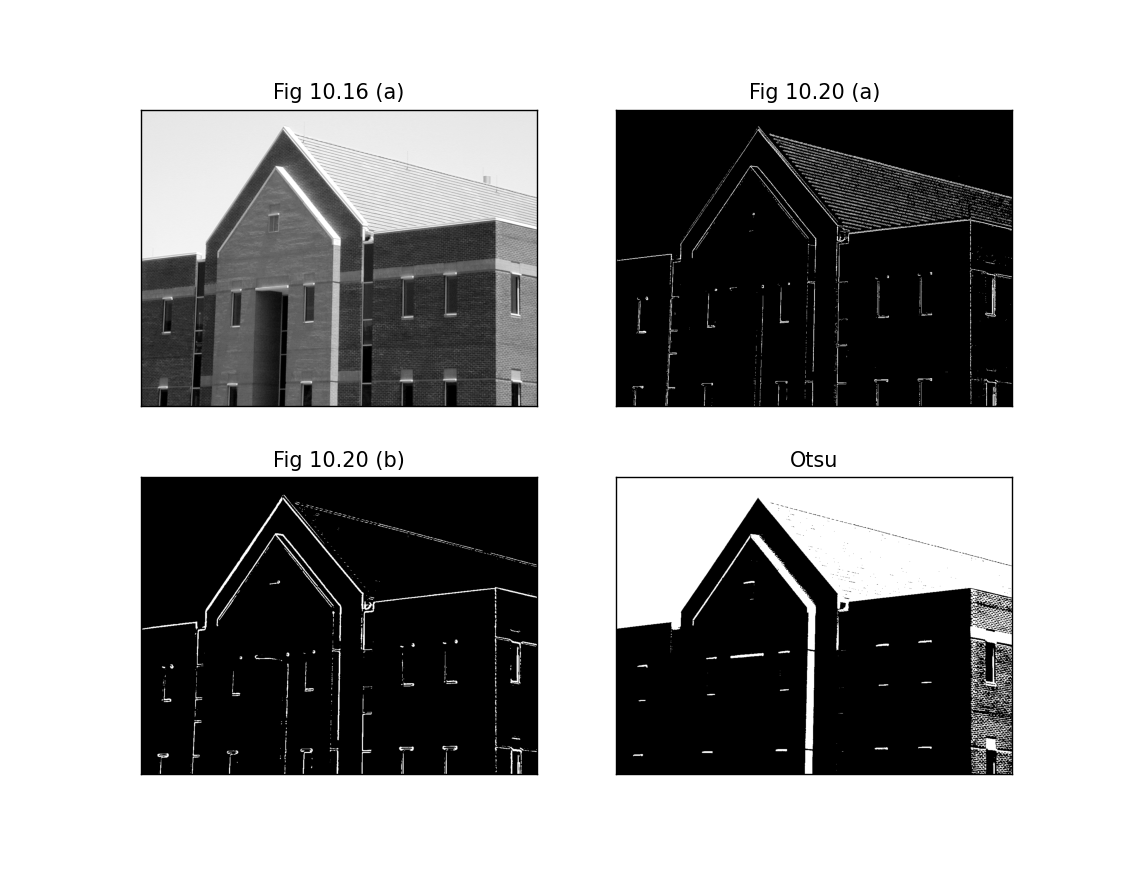

In [13]:
# goruntuler rahat karsilastirilsin diye bir arada cizdirildi
images = [inputImg10_16, outputImg10_20a, outputImg10_20b, outputImg_otsu]
titles = ["Fig 10.16 (a)", "Fig 10.20 (a)", "Fig 10.20 (b)", "Otsu"]

plt.figure(figsize = (9, 7))

for i in range (4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap = "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.show()

### 2.2.

<IPython.core.display.Javascript object>


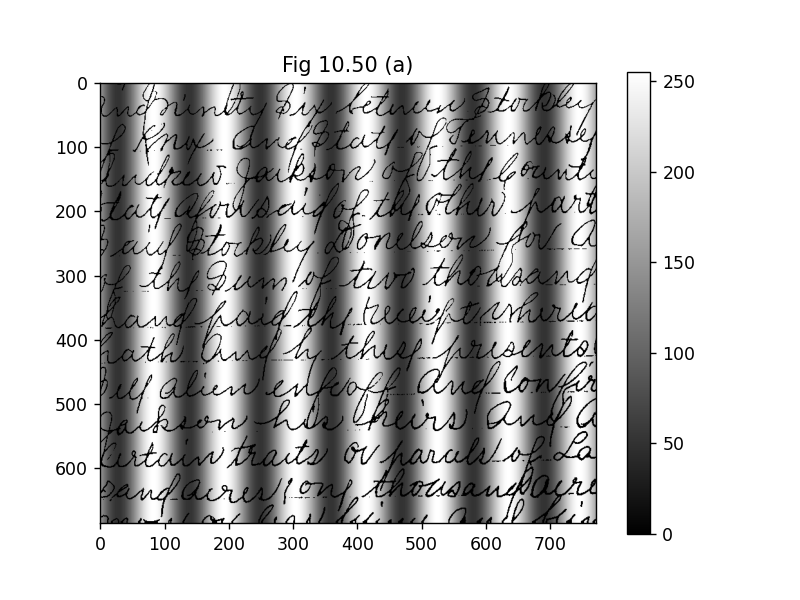

In [14]:
inputImg10_50 = cv.imread("Fig1050(a)(sine_shaded_text_image).pgm", 0)  # goruntu okundu

plt.figure("Fig 10.50 (a)")
plt.imshow(inputImg10_50, cmap = "gray")
plt.title("Fig 10.50 (a)")
plt.colorbar()

### 2.2.1. Otsu metodu

<IPython.core.display.Javascript object>


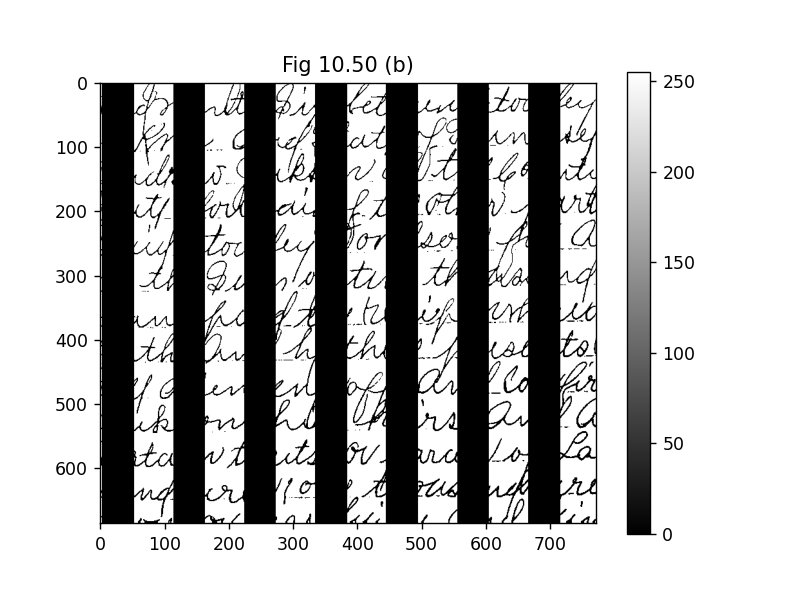

In [15]:
histogram = cv.calcHist([inputImg10_50], [0], None, [256], [0, 256]) # goruntunun histogrami hesaplandi
p = histogram/histogram.sum() # (0-1) araliginda histogram normalize edildi

q1 = 0      # kumulatif toplam icin baslangic degeri
m = 0       # kumulatif ortalama icin baslangic degeri
mg = 0      # global ortalama icin baslangic degeri
var_max = 0 # maksimum varyansi bulmak icin olabilecek min varyans degeri baslangic degeri olarak atandi

for i in range(0, 256):
    mg += i*p[i]   # global ortalama

for i in range(0, 256):
    q1 += p[i]     # kumulatif toplam
    m  += (i*p[i]) # kumulatif ortalama
    var_b = ((mg * q1 - m)**2)/(q1*(1-q1)) # between-class varyans
    
    if var_b > var_max: # eger varyans degeri eldeki maksimum degerden buyukse
        var_max = var_b # yeni maksimum deger bu varyansin degerine esitlendi
        t = i           # varyansin indeksi threshold degeri (t) olarak atandi

# esikleme islemi
thresh, outputImg10_50b = cv.threshold(inputImg10_50, t, 255, cv.THRESH_BINARY) # belirlenen t degerine gore goruntu olusturuldu

# Otsu yontemi ile esiklenmis goruntu cizdirildi
plt.figure("Fig 10.50 (b)")
plt.imshow(outputImg10_50b, cmap = "gray")
plt.title("Fig 10.50 (b)")
plt.colorbar()

### 2.2.2. Hareketli ortalama ile lokal eşikleme

<IPython.core.display.Javascript object>


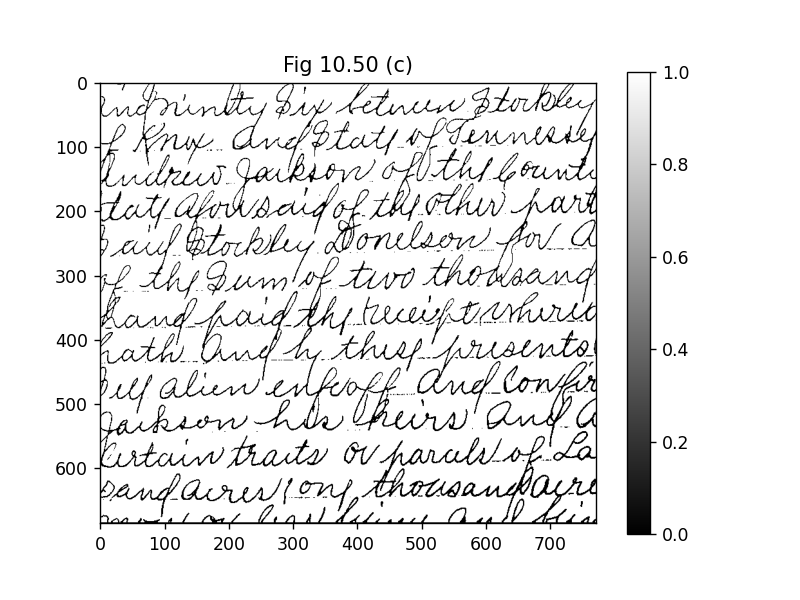

In [16]:
inputImg10_50a = cv.imread("Fig1050(a)(sine_shaded_text_image).pgm", 0)  # goruntu okundu

n = 300 # ortalama hesabina katilacak nokta sayisi
b = 0.5 # sabit

z = inputImg10_50a # giris goruntusunun piksel degerleri z'ye atandi

x, y = inputImg10_50a.shape # giris goruntusunun satir/sutun bilgisi alindi

m = np.zeros((x, y), dtype=np.uint8) # ortalama hesabi icin giris goruntusuyle ayni boyda m olusturuldu
m[0, 0] = (1/n)*(z[0, 0]) # m'ye baslangic degeri verildi

outputImg10_50c = np.zeros((x, y), dtype=np.uint8) # bos cikis goruntusu olusturuldu

# tum pikselleri gezmek icin for dongusu
for x_n in range(1, x-1):
    for y_n in range(1, y-1):
        if (x_n < n-1) or (y_n < n-1): # gorunutunun disinda kalan noktalari almamak icin
            m[x_n+1, y_n+1] = m[x_n, y_n] + (1/n)*z[x_n+1, y_n+1] # moving average hesaplandi
        else:
            m[x_n+1, y_n+1] = m[x_n, y_n] + (1/n)*(int(z[x_n+1, y_n+1])-int(z[x_n-n, y_n-n])) # moving average hesaplandi
        
        T = b*m[x_n, y_n] # o piksel degeri icin threshold degeri hesaplandi
        
        if inputImg10_50a[x_n, y_n] > T:   # eger esigin ustundeyse
            outputImg10_50c[x_n, y_n] = 1  # 1
        else:                              # altindaysa
            outputImg10_50c[x_n, y_n] = 0  # 0

plt.figure("Fig 10.50 (c)")
plt.imshow(outputImg10_50c, cmap = "gray")
plt.title("Fig 10.50 (c)")
plt.colorbar()